# Predicting the Most Valuable Home Improvement Projects In King County

## Introduction

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below. The aim of this project is to develop a linear regression model than can predict which home improvement projects will add to the sale value of homes.

## Business Problem

A client in King County, WA wants to advise homeowners on home improvement projects that will add to the sale value of their homes.

## Analysis Questions

This analysis will seek to answer three questions about the data:

Question 1: Will enclosing a porch increase the sale price of a home?

Question 2: Is converting a garage to a bedroom a good way to increase the sale price of a home?

Question 3: Will upgrading to a forced-air heating system increase the sale price of a home?

## Previewing the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
housing_sales = pd.read_csv('../../data/processed/housing_sales.csv')
housing_sales.head()

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,SaleInstrument,...,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Condition
0,1,2743355,638580,110,07/14/2015,190000,20150715002686,3,6,3,...,0.0,300.0,5.0,2.0,4.0,1.0,0.0,1.0,1963.0,3.0
1,3,2841697,894677,240,12/21/2016,818161,20161228000896,2,6,3,...,0.0,60.0,5.0,2.0,4.0,0.0,1.0,2.0,2016.0,3.0
2,5,2860712,408330,4150,03/15/2017,1069300,20170426000922,3,6,15,...,0.0,0.0,5.0,2.0,5.0,1.0,1.0,1.0,1906.0,4.0
3,6,2813396,510140,4256,07/25/2016,1069300,20160802000964,2,6,15,...,0.0,0.0,5.0,2.0,3.0,0.0,0.0,1.0,1949.0,3.0
4,7,2899303,126320,110,10/30/2017,375000,,3,6,3,...,0.0,0.0,4.0,3.0,3.0,0.0,0.0,1.0,1919.0,3.0


In [21]:
#Dropping the Unnamed: 0 column since no valuable data is provided
housing_sales.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [22]:
housing_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246655 entries, 0 to 246654
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ExciseTaxNbr        246655 non-null  int64  
 1   Major               246655 non-null  int64  
 2   Minor               246655 non-null  int64  
 3   DocumentDate        246655 non-null  object 
 4   SalePrice           246655 non-null  int64  
 5   RecordingNbr        246655 non-null  object 
 6   PropertyType        246655 non-null  int64  
 7   PrincipalUse        246655 non-null  int64  
 8   SaleInstrument      246655 non-null  int64  
 9   SaleReason          246655 non-null  int64  
 10  PropertyClass       246655 non-null  int64  
 11  SaleWarning         246655 non-null  object 
 12  BldgNbr             246655 non-null  float64
 13  NbrLivingUnits      246655 non-null  float64
 14  Address             246655 non-null  object 
 15  BuildingNumber      246655 non-nul

In [26]:
housing_sales.describe()

,ExciseTaxNbr,Major,Minor,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,BldgNbr,...,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Condition
count,2.466550e+05,246655.000000,246655.000000,2.466550e+05,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,...,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000
mean,2.879853e+06,447797.033877,1599.483773,8.386916e+05,6.171170,6.001670,7.015795,4.582101,7.953226,1.029320,...,6.090892,136.399250,4.950088,2.094663,3.425258,0.479561,0.515080,1.584817,1975.587326,3.441897
std,9.809949e+04,287621.330384,2888.105119,7.126497e+05,6.210713,0.101385,6.348185,6.100028,0.343040,0.434099,...,41.531856,356.420356,1.065029,0.591210,0.968409,0.535319,0.662413,0.722849,31.223755,0.692490
min,2.708504e+06,100.000000,1.000000,-6.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1894.000000,1.000000
25%,2.795070e+06,201500.000000,115.000000,4.700000e+05,3.000000,6.000000,3.000000,1.000000,8.000000,1.000000,...,0.000000,0.000000,5.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1954.000000,3.000000
50%,2.879973e+06,382070.000000,330.000000,7.999500e+05,3.000000,6.000000,3.000000,1.000000,8.000000,1.000000,...,0.000000,0.000000,5.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1978.000000,3.000000
75%,2.964752e+06,723040.000000,1050.000000,1.069300e+06,11.000000,6.000000,15.000000,8.000000,8.000000,1.000000,...,0.000000,210.000000,5.000000,2.000000,4.000000,1.000000,1.000000,2.000000,2004.000000,4.000000
max,3.050093e+06,990600.000000,9694.000000,6.250000e+07,99.000000,11.000000,28.000000,19.000000,9.000000,21.000000,...,4330.000000,140000.000000,8.000000,7.000000,31.000000,10.000000,12.000000,10.000000,2020.000000,5.000000


These are large datasets, containing more than 245 thousand entries and 40 columns. Almost all of the columns contain numeric data, which is convenient for linear regression. A look at the distribution of variables in the dataset:

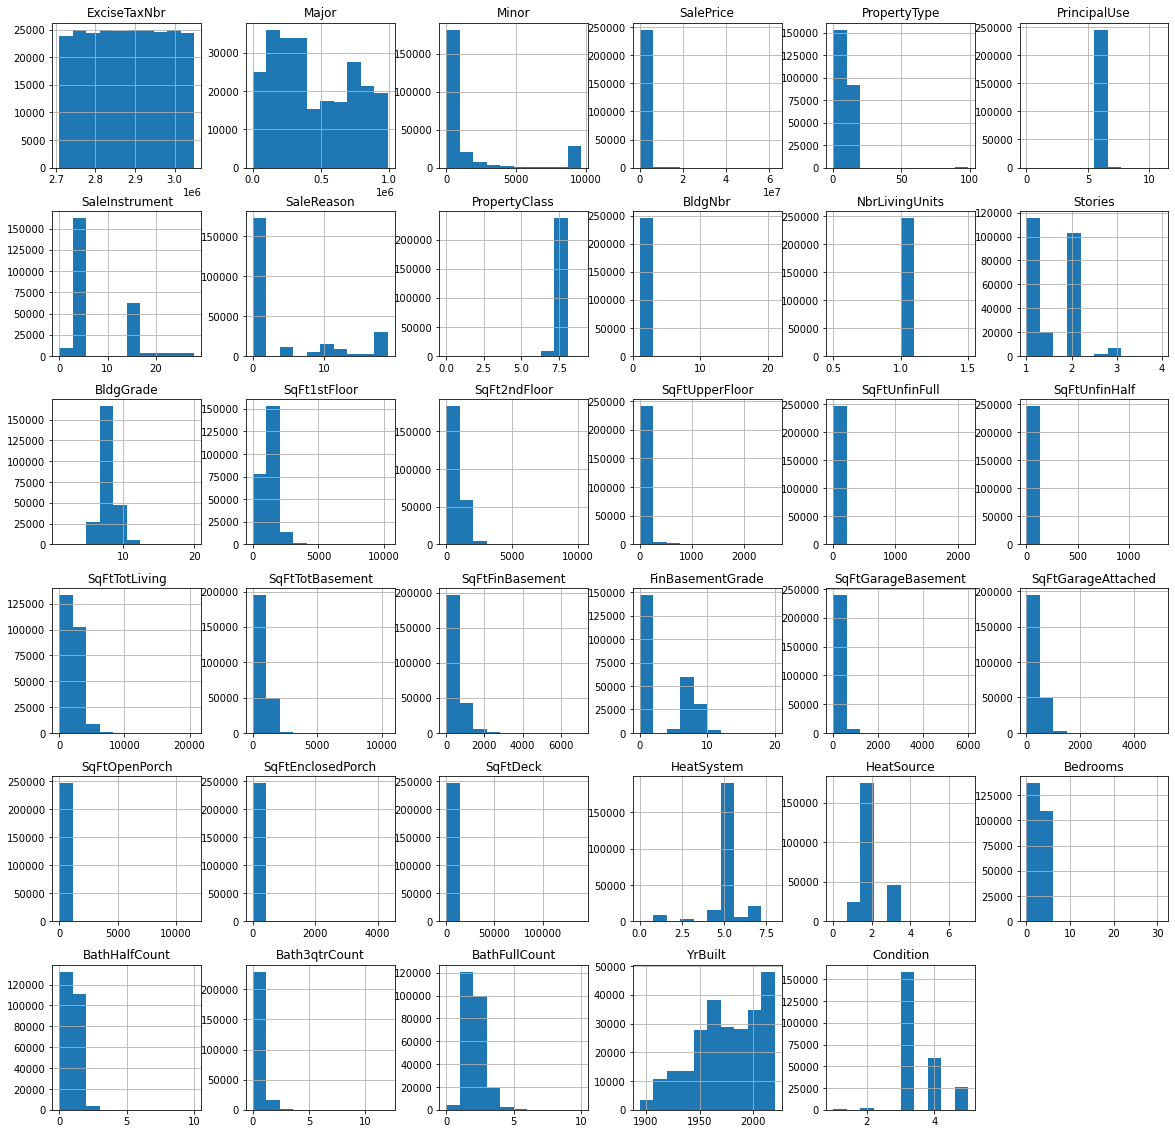

In [23]:
housing_sales.hist(figsize=(20,20));

I will check for any missing values:

In [24]:
for column in list(housing_sales.columns):
    print(column, sum(housing_sales[column].isnull()))

ExciseTaxNbr 0
Major 0
Minor 0
DocumentDate 0
SalePrice 0
RecordingNbr 0
PropertyType 0
PrincipalUse 0
SaleInstrument 0
SaleReason 0
PropertyClass 0
SaleWarning 0
BldgNbr 0
NbrLivingUnits 0
Address 0
BuildingNumber 0
Stories 0
BldgGrade 0
SqFt1stFloor 0
SqFt2ndFloor 0
SqFtUpperFloor 0
SqFtUnfinFull 0
SqFtUnfinHalf 0
SqFtTotLiving 0
SqFtTotBasement 0
SqFtFinBasement 0
FinBasementGrade 0
SqFtGarageBasement 0
SqFtGarageAttached 0
DaylightBasement 0
SqFtOpenPorch 0
SqFtEnclosedPorch 0
SqFtDeck 0
HeatSystem 0
HeatSource 0
Bedrooms 0
BathHalfCount 0
Bath3qtrCount 0
BathFullCount 0
YrBuilt 0
Condition 0


## One-Hot Encoding

The main variable I would expect to be highly related with price, but does not have a clear linear relationship is 'Condition'. The 'Condition' column values are on a scale of 1 to 5, with 1 being 'poor' and 5 being 'very good.' As seen in the scatterplot below, in terms of price 'average' houses tend to perform best.

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Condition and Price')

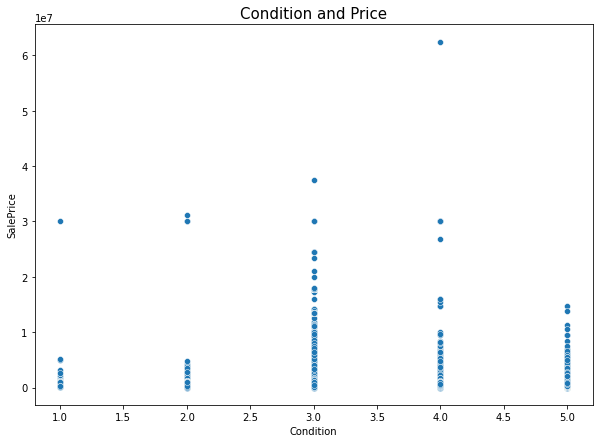

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(housing_sales['Condition'], housing_sales['SalePrice'])
plt.title('Condition and Price', fontsize=15)